In [1]:
#Mount your drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Code

1.   Load the MNIST dataset as in Homework 1.
Filter the dataset into a subset that contains only the '3' and '9' images.

2.   Implement and run the kMeans algorithm on this subset with k = 2, 3, 5, 10.

3.   Reduce the dimensionality of the raw '3' and '9' images of the subset from 784 to eigenspaces 2, 5 and 10 dimensions (that is, you will have 3 new datasets). Implement and run the kMeans algorithm on these new subsets with k = 2, 3, 5, 10.

In total, you'd run your kMeans 16 times.

Loading data...
... data has been loaded!


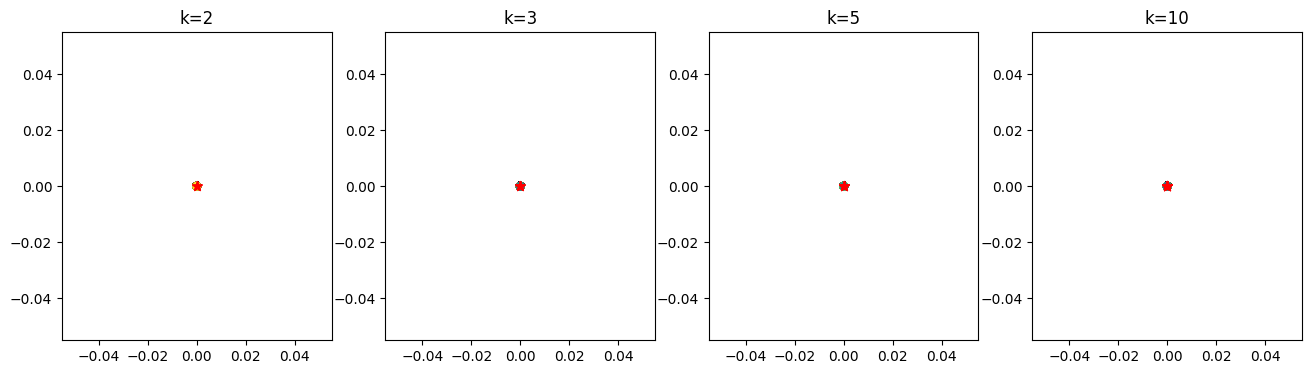

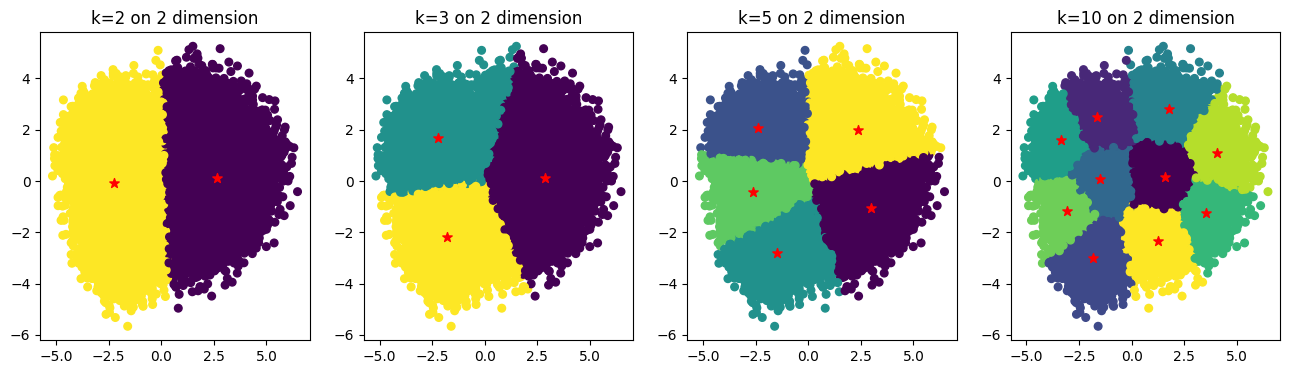

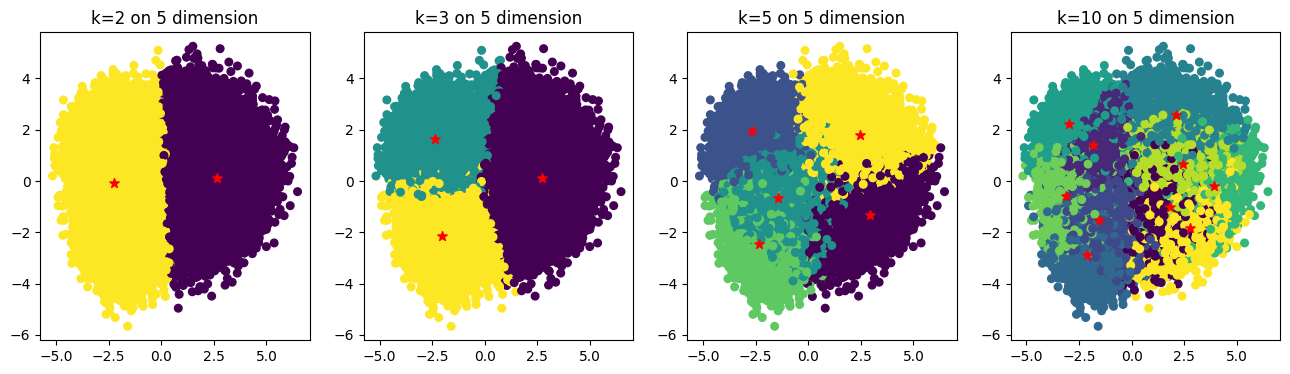

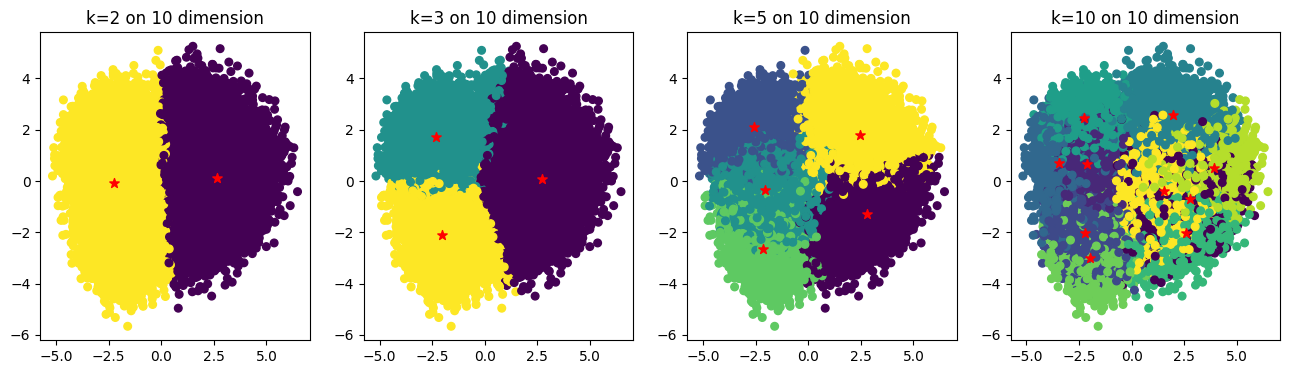

In [21]:
# Code here

import os
import urllib.request
import gzip
import pickle
import numpy as np
import matplotlib.pyplot as plt

# from Homework1
def load_data(dataset):
  if not os.path.isfile(dataset):
    origin = (
      'http://www.iro.umontreal.ca/~lisa/deep/data/mnist/mnist.pkl.gz'
    )
    print('Downloading data from %s' % origin)
    urllib.request.urlretrieve(origin, dataset)
  print('Loading data...')

  with gzip.open(dataset, 'rb') as f:
    try:
      train_set, valid_set, test_set = pickle.load(f, encoding='latin1')
    except:
      train_set, valid_set, test_set = pickle.load(f)
  print('... data has been loaded!')

  return train_set, valid_set, test_set

def filter(data, labels, digits):
  filtered_data = []
  filtered_labels = []

  for i in range(len(data)):
    if labels[i] in digits:
      filtered_data.append(data[i])
      filtered_labels.append(labels[i])

  return np.array(filtered_data), np.array(filtered_labels)

def kmeans(data, k, max=100):
  np.random.seed(0)
  centroids = data[np.random.choice(data.shape[0], k, replace=False)]

  for _ in range(max):
    distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
    if np.all(new_centroids == centroids):
      break
    centroids = new_centroids

  return centroids, labels

def pca(data, num_components):
  centered_data = data - data.mean(axis=0)
  cov_matrix = np.cov(centered_data, rowvar=False)
  eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)
  sorted_indices = np.argsort(eigenvalues)[::-1]
  top_indices = sorted_indices[:num_components]
  reduced_data = np.dot(centered_data, eigenvectors[:, top_indices])
  return reduced_data

# Plot data points and centroids
def plot_clusters(data, labels, centroids, title, pos):
  plt.subplot(1, 4, pos + 1)
  plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', s=30)
  plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='*', s=50)
  plt.title(title)

# 1) Load the MNIST dataset as in Homework 1.
dataset_file = 'mnist.pkl.gz'
train_set, _, _ = load_data(dataset_file)
x, y = train_set # data, label

# 2) Filter the dataset into a subset that contains only the '3' and '9' images.
filtered_x, filtered_y = filter(x, y, digits=[3, 9])

# 3) Implement and run the kMeans algorithm on this subset with k = 2, 3, 5, 10
k_values = [2, 3, 5, 10]
plt.figure(figsize=(16,4))
for i, k in enumerate(k_values):
  centroids, _ = kmeans(filtered_x, k)
  # print(f'k={k}:')
  # print(centroids)
  plot_clusters(filtered_x, _, centroids, f'k={k}', i)


# 4) Reduce the dimensionality of the raw '3' and '9' images of the subset from 784 to eigenspaces 2, 5 and 10 dimensions.
dimensions = [2, 5, 10]
for dimension in dimensions:
  reduced_x = pca(filtered_x, dimension)
  # 5) Implement and run the kMeans algorithm on these new subsets with k = 2, 3, 5, 10.
  plt.figure(figsize=(16,4))
  for i, k in enumerate(k_values):
    centroids, _ = kmeans(reduced_x, k)
    # print(f'k={k} on {dim} dimension')
    # print(centroids)
    plot_clusters(reduced_x, _, centroids, f'k={k} on {dimension} dimension', i)

  plt.show()

# ChatGPT prompts

Now solve the same task with ChatGPT with the following prompts:


1.   Can you provide a code to filter the MNIST dataset so that we only have the 9 and 3 samples?
2.   Can you compute the kmeans of this filtered dataset without using any specialized library (coding kmeans from scratch) with k=2,3,5,10?
3.   Can you reduce the dimensionality of the filtered dataset to eigenspaces of dimension 2, 5 and 10 instead of 784?
4.   Can you use the kmeans function from scratch and compute it for the new projected datasets using k=2,3,5 and 10?

**Paste the answer provided and run the code below:**

In [1]:
import urllib.request
import gzip
import pickle
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 데이터를 불러오고 필터링하는 함수
def filter_data(data, labels, digits):
    filtered_mask = np.isin(labels, digits)
    filtered_data = data[filtered_mask]
    filtered_labels = labels[filtered_mask]
    return filtered_data, filtered_labels

# MNIST 데이터 불러오기
train_set, _, _ = load_data('mnist.pkl.gz')
data, labels = train_set

# '3'과 '9' 숫자만 필터링
filtered_data, filtered_labels = filter_data(data, labels, digits=[3, 9])

# K-Means 클러스터링을 위한 k 값 리스트
k_values = [2, 3, 5, 10]

# K-Means 클러스터링 수행 및 결과 출력
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(filtered_data)
    cluster_centers = kmeans.cluster_centers_
    cluster_labels = kmeans.labels_
    print(f'K-Means with k={k}:')
    print(cluster_centers)

# 차원 축소를 위한 차원 값 리스트
dimensions = [2, 5, 10]

# PCA를 사용한 차원 축소 및 K-Means 클러스터링
for dim in dimensions:
    pca = PCA(n_components=dim)
    reduced_data = pca.fit_transform(filtered_data)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=0)
        kmeans.fit(reduced_data)
        cluster_centers = kmeans.cluster_centers_
        cluster_labels = kmeans.labels_
        print(f'K-Means with k={k} on PCA dimension {dim}:')
        print(cluster_centers)


Loading data...
... data has been loaded!
K-Means with k=2:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K-Means with k=3:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K-Means with k=5:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K-Means with k=10:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
K-Means with k=2 on PCA dimension 2:
[[ 2.66725019  0.09791491]
 [-2.26220339 -0.08304559]]
K-Means with k=3 on PCA dimension 2:
[[ 2.86769603  0.10766342]
 [-2.24135512  1.6854716 ]
 [-1.81609549 -2.16845589]]
K-Means with k=5 on PCA dimension 2:
[[ 2.96481489 -1.04470735]
 [-2.3828641   2.08014502]
 [-1.49076258 -2.78734525]
 [-2.6450419  -0.44578015]
 [ 2.35091917  1.99225311]]
K-Means with k=10 on PCA dimension 2:
[[ 1.56832071  0.16490188]
 [-1.64486283  2.48169884]


# Report



1.   What are some differences you notice between your code and ChatGPT's? (Name at least 3)

1) GPT suggest the sklearn library to perform k-mean. I think GPT recommend sklearn because it can be implemented briefly and simply by using an already implemented library rather than basic libraries.

2) GPT shows the result of k-mean using matrix, in contrast my code shows as graph. Wouldn't it be a evidence that human know best how to make people understand? On the other hand, GPT attempts to present logical and accurate facts.

3) Sampling the dataset into a subset that contains only the '3' and '9' images is different.

GPT
```python
def filter_data(data, labels, digits):
    filtered_mask = np.isin(labels, digits)
    filtered_data = data[filtered_mask]
    filtered_labels = labels[filtered_mask]
    return filtered_data, filtered_labels
```
My code
```python
def filter(data, labels, digits):
  filtered_data = []
  filtered_labels = []

  for i in range(len(data)):
    if labels[i] in digits:
      filtered_data.append(data[i])
      filtered_labels.append(labels[i])
```
I could not say no that gpt's code is much cleaner and clearer. I still have not familiar enough with Python.

---
2.   Ask ChatGPT how can you judge if a cluster is correctly computed. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

>GPT Response: <br>
Evaluating whether a cluster is correctly computed depends on the specific problem and goals you have in mind. There are several methods and metrics that can help you assess the quality of clusters in unsupervised machine learning. Here are some commonly used techniques:
1. **Inertia**: Inertia, also known as within-cluster sum of squares, measures the compactness of clusters. It is the sum of squared distances from each point to its assigned cluster center. A lower inertia indicates more compact clusters. However, inertia alone may not be sufficient to judge cluster quality.
2. **Silhouette Score**: The silhouette score measures how similar each point in one cluster is to the points in the neighboring clusters. The score ranges from -1 to 1, where a higher score indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
3. **Davies-Bouldin Index**: This index measures the average similarity ratio of each cluster with the cluster that is most similar to it. A lower Davies-Bouldin index indicates better clustering.
4. **Calinski-Harabasz Index (Variance Ratio Criterion)**: This index measures the ratio of between-cluster variance to within-cluster variance. A higher Calinski-Harabasz score indicates better-defined clusters.
5. **Visual Inspection**: Sometimes, simply visualizing the clusters can provide insights. Scatter plots, t-SNE plots, or other dimensionality reduction techniques can help you assess whether the data points in the same cluster are indeed similar and whether the clusters make sense according to domain knowledge.
6. **Domain Knowledge**: Often, domain knowledge plays a crucial role in evaluating the quality of clusters. If you have a clear understanding of the problem and know what you expect from the clusters, you can judge the results based on whether they align with your expectations.<br><br>
It's important to note that there is no one-size-fits-all metric for cluster quality. The choice of evaluation metric depends on the nature of your data, the clustering algorithm used, and the specific problem you are trying to solve. In many cases, it's a good practice to use a combination of these methods and to consider both quantitative and qualitative assessments.

ChatGPT's statement is right. The assessment of whether a cluster is correctly computed indeed depends on various enviroment, and there is no universal metric that can determine cluster quality across all scenarios.
The metrics mentioned in the response, such as inertia, silhouette score, Davies-Bouldin Index, and Calinski-Harabasz Index, are widely accepted methods for assessing cluster quality. Visual inspection and domain knowledge are also crucial, as they provide qualitative insights into the meaningfulness of the clusters. Sometimes, visualizing the data, as I attempted in the code above, is effective ways to judge the quality of the clustering results.

---
3.   Ask ChatGPT how can we know which k is the correct parameter for a kMeans algorithm. Paste the answer here. Do you agree with ChatGPT's statement? Why yes or why not?

> GPT Response: <br>
Determining the correct value of k (the number of clusters) for a K-Means algorithm is a common challenge in clustering analysis. There are several methods and techniques you can use to estimate the optimal k value. Here are some of the most widely used approaches:
1. **Elbow Method**: The elbow method involves running K-Means with a range of k values and plotting the sum of squared distances (inertia) for each k. As k increases, the inertia typically decreases because clusters are smaller. The "elbow" in the plot is the point where adding more clusters no longer significantly reduces the inertia. This point is often considered the optimal k. However, the elbow method is not always definitive, and the choice can be somewhat subjective.
2. **Silhouette Score**: The silhouette score measures how similar each data point is to its own cluster compared to other clusters. It ranges from -1 to 1, and a higher score indicates that the data point is well matched to its cluster. You can compute the silhouette score for different k values and choose the one with the highest score.
3. **Gap Statistics**: Gap statistics compare the performance of K-Means clustering on your data to a random distribution. It calculates the difference between the observed intra-cluster variation and the expected intra-cluster variation for various k values. The k that maximizes this gap is considered the optimal k.
4. **Davies-Bouldin Index**: The Davies-Bouldin index measures the average similarity ratio of each cluster with the cluster that is most similar to it. A lower Davies-Bouldin index indicates better clustering. You can calculate it for different k values and choose the one with the lowest index.
5. **Calinski-Harabasz Index**: The Calinski-Harabasz index (Variance Ratio Criterion) measures the ratio of between-cluster variance to within-cluster variance. A higher score indicates better-defined clusters. You can choose the k that maximizes this index.
6. **Visual Inspection**: Visualizing the clusters for different k values can provide insights. Use scatter plots, t-SNE, or other dimensionality reduction techniques to assess whether the clusters make sense visually.
7. **Cross-Validation**: Split your data into training and testing sets and perform K-Means clustering with different k values on the training data. Then, evaluate the clustering on the test data. Cross-validation can help prevent overfitting and find a robust k value.
8. **Domain Knowledge**: If you have prior knowledge of the problem or data, you might have an idea of a reasonable range for k based on the structure of the data or the problem's requirements.<br><br>
It's essential to note that the choice of the best k is not always straightforward, and different methods may suggest different values. Moreover, the "correct" k may vary depending on the specific problem you are trying to solve. Therefore, it's often recommended to combine multiple approaches and consider both quantitative and qualitative assessments to make an informed decision about the optimal k value.

Yes, there are various ways to figure out correct parameter. Most important thing is 'correct' value depends on the domain, and even no correct answer exist (https://data-workspace.tistory.com/37). So GPT's answer penetrates the essence. Just like answer about Question2, there are no right answer to fit all. Sometimes, this problem requires a combination of quantitative and qualitative approaches (https://hyunse0.tistory.com/49).

---
4.   Conclude with some thoughts and things you learned from this homework.

In this homework, I experienced K-Means clustering and dimensionality reduction techniques.
Now I know K-Means is a powerful unsupervised learning technique that can discover underlying patterns in data. It can be used for various tasks, including image compression, customer segmentation, and more. Selecting the optimal number of clusters, K, would be a important challenge in K-Means clustering.
Principal Component Analysis (PCA) is a dimensionality reduction technique that allows us to reduce the number of features while retaining as much information as possible. It was an opportunity for experimentation to gain an intuitive understanding of how formulas actually work.

Also, as I saw that cluster performance deteriorated as k in K-means and dim in PCA increased, I became curious about the limitations of the above algorithms themselves. Next class might be fun than before.







